In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import json
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime
import shutil

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

**1-meta data of type .json
 2-phone data of type .csv
The meta data holds information from sellers point of view and the phone data holds user information. We begin by unzipping the meta data file and extracting its content to a list**

In [ ]:
#Read the Given Data

#Path to the meta data zip file. 'sentiment_analysis' is the folder name under 'My Drive'
p1 = '/content/drive/MyDrive/Project/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
p2 = '/content/drive/MyDrive/Project/meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file
with gzip.open(p1, 'rb') as f_in:
    with open(p2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
# Creating empty list to store the data after unzipping it
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(p2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [ ]:
#To check the length of the phonemetadata
len(phonemetadata)

590071

**Taking Useful columns to form dataframe**


In [ ]:
# To check the phonemetadata
phonemetadata

[{'category': ['Cell Phones & Accessories',
   'Accessories',
   'Screen Protectors'],
  'tech1': '',
  'description': [],
  'fit': '',
  'title': 'Trollies Sing a Long Party VHS',
  'also_buy': [],
  'image': [],
  'tech2': '',
  'brand': '',
  'feature': [],
  'rank': '557,379 in Movies & TV (',
  'also_view': [],
  'details': {'ASIN: ': '6303195164'},
  'main_cat': 'Movies & TV',
  'similar_item': '',
  'date': '',
  'price': '',
  'asin': '6303195164'},
 {'category': ['Cell Phones & Accessories',
   'Accessories',
   'Car Accessories',
   'Car Cradles & Mounts'],
  'tech1': '',
  'description': [],
  'fit': '',
  'title': 'La Pura VHS',
  'also_buy': [],
  'image': [],
  'tech2': '',
  'brand': 'Maribel Guardia',
  'feature': [],
  'rank': '1,024,449 in Movies & TV (',
  'also_view': [],
  'details': {'ASIN: ': '630524412X'},
  'main_cat': 'Movies & TV',
  'similar_item': '',
  'date': '',
  'price': '',
  'asin': '630524412X'},
 {'category': ['Cell Phones & Accessories', 'Cases, H

In [ ]:
#Converting list phonemetadata into dataframe
df = pd.DataFrame(phonemetadata, columns=['category','description', 'title', 'also_buy','brand', 'feature', 
                                                 'rank','also_view','similar_item', 'date', 'price', 'asin'])

In [ ]:
#To check the shape of dataframe
df.shape

(590071, 12)

In [ ]:
# Categorizing only Cell Phone Category for furture analysis
df['category'] = df['category'].astype(str)
df = df[df.category.str.contains("'Cell Phones'")]

In [ ]:
#Again check the shape
df.shape

(9823, 12)

In [ ]:
#To check the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 36 to 590019
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      9823 non-null   object
 1   description   9823 non-null   object
 2   title         9823 non-null   object
 3   also_buy      9823 non-null   object
 4   brand         9823 non-null   object
 5   feature       9823 non-null   object
 6   rank          9823 non-null   object
 7   also_view     9823 non-null   object
 8   similar_item  9823 non-null   object
 9   date          9823 non-null   object
 10  price         9823 non-null   object
 11  asin          9823 non-null   object
dtypes: object(12)
memory usage: 997.6+ KB


In [ ]:
#Drop the duplicates
df=df.loc[df.astype(str).drop_duplicates().index]

In [ ]:
#To check the shape
df.shape

(9789, 12)

In [ ]:
#To check the top 5 rows  of dataset
df.head()

category  \
36    ['Cell Phones & Accessories', 'Cell Phones', '...   
1274  ['Cell Phones & Accessories', 'Cell Phones', '...   
1295       ['Cell Phones & Accessories', 'Cell Phones']   
1354  ['Cell Phones & Accessories', 'Cell Phones', '...   
1361  ['Cell Phones & Accessories', 'Cell Phones', '...   

                                            description  \
36    [ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...   
1274  [Standard package: 1 x original phone 1 x Qual...   
1295  [The Nokia 5180i is a handset offered by TracF...   
1354  [Based on Motorola&#x92;s i90c phone, the i95c...   
1361  [This is a GSM Samsung R225 cellular phone tha...   

                                                  title  \
36    UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...   
1274                              Nokia 3310 Blue Nokia   
1295  Nokia 5180i TracFone Prepaid Cell Phone with 1...   
1354                      Motorola i95cl Phone (Nextel)   
1361                  T-Mobile Dual-Band Wireless Phone   

                      also_buy    brand  \
36                          []      Ice   
1274  [B075FL4H89, B00R25GJJW]    Nokia   
1295                        []    Nokia   
1354                        []            
1361                        []  Samsung   

                                                feature  \
36    [2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...   
1274  [GSM 900/1800, Simple and elegant, Classic mod...   
1295                                                 []   
1354                                                 []   
1361                                                 []   

                                                   rank  \
36    [>#6,356,920 in Cell Phones & Accessories (See...   
1274  [>#32,759 in Electronics (See Top 100 in Elect...   
1295                                                 []   
1354  [>#3,798,962 in Cell Phones & Accessories (See...   
1361  [>#5,552,033 in Cell Phones & Accessories (See...   

                                              also_view  \
36                                                   []   
1274  [B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...   
1295                                                 []   
1354                                                 []   
1361                                                 []   

                                           similar_item              date  \
36                                                                          
1274   class="a-bordered a-horizontal-stripes  a-spa...  October 19, 2014   
1295                                                                        
1354                                                                        
1361                                                                        

     price        asin  
36          8050110508  
1274        B00005KBGR  
1295        B00005S0M4  
1354        B00006J9HH  
1361        B00006LIQB

In [ ]:
#Reading the .csv file of the phone data into a dataframe

phonedata = pd.read_csv('/content/drive/MyDrive/Project/Cell_Phones_and_Accessories_5.csv',index_col=False)

In [ ]:
#To check the shape of the data
phonedata.shape

(1128437, 12)

In [ ]:
#To check the information of the data
phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 95.8+ MB


In [ ]:
#Drop images column
phonedata1=phonedata.drop(['image'],axis=1)

In [ ]:
#To check the information of the data
phonedata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  review_sentiment  1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 87.2+ MB


In [ ]:
#To check the top 5 rows
phonedata1.head()

overall  verified      reviewerID        asin                 style  \
0      5.0      True  A24E3SXTC62LJI  7508492919  {'Color:': ' Bling'}   
1      5.0      True  A269FLZCB4GIPV  7508492919                   NaN   
2      3.0      True   AB6CHQWHZW4TV  7508492919                   NaN   
3      2.0      True   A1M117A53LEI8  7508492919                   NaN   
4      4.0      True  A272DUT8M88ZS8  7508492919                   NaN   

       reviewerName                                         reviewText  \
0  Claudia Valdivia  Looks even better in person. Be careful to not...   
1       sarah ponce  When you don't want to spend a whole lot of ca...   
2               Kai  so the case came on time, i love the design. I...   
3   Sharon Williams  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...   
4   Bella Rodriguez  I liked it because it was cute, but the studs ...   

                               summary  unixReviewTime vote review_sentiment  
0  Can't stop won't stop looking at it      1407110400  NaN         POSITIVE  
1                                    1      1392163200  NaN         POSITIVE  
2                             Its okay      1391817600  NaN         NEGATIVE  
3                                 CASE      1391472000  NaN         POSITIVE  
4                                Cute!      1391385600  NaN         POSITIVE

In [ ]:
#Drop the duplicate data
phonedata1=phonedata1.drop_duplicates(keep='first')

In [ ]:
#To again check the shape of the data
phonedata1.shape

(1124985, 11)

**Data Preprocessing**

In [ ]:
#Transforming unixReview time to date time format
from datetime import datetime, timedelta
phonedata1['unixReviewTime'] = phonedata1['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))

In [ ]:
# To check the info of the data
phonedata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124985 entries, 0 to 1128436
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1124985 non-null  float64
 1   verified          1124985 non-null  bool   
 2   reviewerID        1124985 non-null  object 
 3   asin              1124985 non-null  object 
 4   style             604371 non-null   object 
 5   reviewerName      1124829 non-null  object 
 6   reviewText        1124218 non-null  object 
 7   summary           1124460 non-null  object 
 8   unixReviewTime    1124985 non-null  object 
 9   vote              91533 non-null    object 
 10  review_sentiment  1124985 non-null  object 
dtypes: bool(1), float64(1), object(9)
memory usage: 95.5+ MB


In [ ]:
#Replacing na values
phonedata1.overall = phonedata1.overall.astype(int)
phonedata1['reviewText'].replace('', np.nan, inplace=True)
phonedata1.dropna(subset=['reviewText'], inplace=True)
phonedata1['summary'].replace('', np.nan, inplace=True)
phonedata1.dropna(subset=['summary'], inplace=True)
phonedata1['style'].replace('', np.nan, inplace=True)
phonedata1['vote'].replace('', np.nan, inplace=True)

In [ ]:
#To find the percentage of the missing values
round(((phonedata1.isnull().sum()*100)/len(phonedata1.index)),2)

overall              0.00
verified             0.00
reviewerID           0.00
asin                 0.00
style               46.28
reviewerName         0.01
reviewText           0.00
summary              0.00
unixReviewTime       0.00
vote                91.86
review_sentiment     0.00
dtype: float64

In [ ]:
#Fill na values with bfill method
phonedata1 = phonedata1.fillna(method ='bfill')

In [ ]:
#To again  check the percentage of na values 
round(((phonedata1.isnull().sum()*100)/len(phonedata1.index)),2)

overall             0.00
verified            0.00
reviewerID          0.00
asin                0.00
style               0.00
reviewerName        0.00
reviewText          0.00
summary             0.00
unixReviewTime      0.00
vote                0.02
review_sentiment    0.00
dtype: float64

In [ ]:
#Change the name of  Overall Column 
phonedata1 = phonedata1.rename(columns={'overall': 'Rating'})

print ("Total data:", str(phonedata1.shape))

Total data: (1123744, 11)


In [ ]:
#To check the top 5 rows
phonedata1.head()

Rating  verified      reviewerID        asin                 style  \
0       5      True  A24E3SXTC62LJI  7508492919  {'Color:': ' Bling'}   
1       5      True  A269FLZCB4GIPV  7508492919  {'Color:': ' White'}   
2       3      True   AB6CHQWHZW4TV  7508492919  {'Color:': ' White'}   
3       2      True   A1M117A53LEI8  7508492919  {'Color:': ' White'}   
4       4      True  A272DUT8M88ZS8  7508492919  {'Color:': ' White'}   

       reviewerName                                         reviewText  \
0  Claudia Valdivia  Looks even better in person. Be careful to not...   
1       sarah ponce  When you don't want to spend a whole lot of ca...   
2               Kai  so the case came on time, i love the design. I...   
3   Sharon Williams  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...   
4   Bella Rodriguez  I liked it because it was cute, but the studs ...   

                               summary unixReviewTime vote review_sentiment  
0  Can't stop won't stop looking at it     2014-08-03  2.0         POSITIVE  
1                                    1     2014-02-11  2.0         POSITIVE  
2                             Its okay     2014-02-07  2.0         NEGATIVE  
3                                 CASE     2014-02-03  2.0         POSITIVE  
4                                Cute!     2014-02-02  2.0         POSITIVE

In [ ]:
#To check the name of columns
phonedata1.columns

Index(['Rating', 'verified', 'reviewerID', 'asin', 'style', 'reviewerName',
       'reviewText', 'summary', 'unixReviewTime', 'vote', 'review_sentiment'],
      dtype='object')

In [ ]:
#To check the previous dataset columns
df.columns

Index(['category', 'description', 'title', 'also_buy', 'brand', 'feature',
       'rank', 'also_view', 'similar_item', 'date', 'price', 'asin'],
      dtype='object')

**Merging phone data and metadata in Pandas**

In [ ]:
#To merge phone data and metadata 
product_rs=pd.merge(phonedata1,df,on='asin',how='left')

In [ ]:
#To check the shape of the dataset
product_rs.shape

(1123744, 22)

In [ ]:
#To check the info of the dataset
product_rs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1123744 entries, 0 to 1123743
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Rating            1123744 non-null  int64 
 1   verified          1123744 non-null  bool  
 2   reviewerID        1123744 non-null  object
 3   asin              1123744 non-null  object
 4   style             1123738 non-null  object
 5   reviewerName      1123744 non-null  object
 6   reviewText        1123744 non-null  object
 7   summary           1123744 non-null  object
 8   unixReviewTime    1123744 non-null  object
 9   vote              1123504 non-null  object
 10  review_sentiment  1123744 non-null  object
 11  category          63438 non-null    object
 12  description       63438 non-null    object
 13  title             63438 non-null    object
 14  also_buy          63438 non-null    object
 15  brand             63438 non-null    object
 16  feature           

In [ ]:
#To check the percentage of missing values
round(((product_rs.isnull().sum()*100)/len(product_rs.index)),2)

Rating               0.00
verified             0.00
reviewerID           0.00
asin                 0.00
style                0.00
reviewerName         0.00
reviewText           0.00
summary              0.00
unixReviewTime       0.00
vote                 0.02
review_sentiment     0.00
category            94.35
description         94.35
title               94.35
also_buy            94.35
brand               94.35
feature             94.35
rank                94.35
also_view           94.35
similar_item        94.35
date                94.35
price               94.35
dtype: float64

**Data Wrangling**

In [ ]:
# DROP null values from product title column
product_rw2=product_rs.dropna(subset=['title'])

In [ ]:
#To check the shape of the dataset
product_rw2.shape

(63438, 22)

In [ ]:
#To Check the two rows
product_rw2.head(2)

Rating  verified      reviewerID        asin  \
654       1     False   A5JLAU2ARJ0BO  B0000E3GWH   
655       4     False  A1ACM1CBGORBN1  B0000E3GWH   

                                        style  reviewerName  \
654  {'Package Type:': ' Standard Packaging'}  Old-and-Wise   
655  {'Package Type:': ' Standard Packaging'}  Sherry Berry   

                                            reviewText  \
654  This phone is ugly and heavy and has a terribl...   
655  I had the Samsung V205 and then I decided to t...   

                                             summary unixReviewTime  vote  \
654                                    Bad reception     2004-09-20   2.0   
655  Pretty good phone.. an improvement from my v205     2004-07-23  15.0   

    review_sentiment                                           category  \
654         NEGATIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   
655         POSITIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   

                                           description  \
654  [Compatible with T-Mobile cellular service, Sa...   
655  [Compatible with T-Mobile cellular service, Sa...   

                                                 title also_buy    brand  \
654  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   
655  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   

    feature                                               rank also_view  \
654      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   
655      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   

    similar_item date price  
654                          
655

In [ ]:
#To show the unique values in title column
product_rw2.title.unique()

array(['Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone',
       'PCS Phone palmOne Treo 600 (Sprint)',
       'Motorola i730 Phone (Nextel)', ...,
       'Unlocked JIAKE miniS5 MTK6572 2G ROM 5.0 Inch Android 4.2 3G Smartphone(Black)',
       'Sony Xperia Z3 Factory Unlocked Phone - Retail Packaging - White',
       'Samsung Galaxy Light SGH-T399N Android 4G-LTE Metro PCS Smartphone Brown'],
      dtype=object)

In [ ]:
# EXTRACTING PHONES FROM TITLE COLUMN
product_r = product_rw2[product_rw2["title"].str.contains("Phones|Phone|phones|phone")]

In [ ]:
#To check the shape of the dataset
product_r.shape

(45562, 22)

In [ ]:
#To check the missing value
product_r.isnull().sum()

Rating              0
verified            0
reviewerID          0
asin                0
style               0
reviewerName        0
reviewText          0
summary             0
unixReviewTime      0
vote                2
review_sentiment    0
category            0
description         0
title               0
also_buy            0
brand               0
feature             0
rank                0
also_view           0
similar_item        0
date                0
price               0
dtype: int64

In [ ]:
#Drop null values from vote column
product_r1=product_r.dropna(subset=['vote'])

In [ ]:
#To check the null values
product_r1.isnull().sum()

Rating              0
verified            0
reviewerID          0
asin                0
style               0
reviewerName        0
reviewText          0
summary             0
unixReviewTime      0
vote                0
review_sentiment    0
category            0
description         0
title               0
also_buy            0
brand               0
feature             0
rank                0
also_view           0
similar_item        0
date                0
price               0
dtype: int64

In [ ]:
#To check the shape of the dataset
product_r1.shape

(45560, 22)

In [ ]:
#Dropping date and price column as we will be not be using it further
product_r1 = product_r1.drop(['date'], axis = 1)

In [ ]:
# CONCATENATE REVIEWTEXT AND SUMMARY 
product_r1['review_text'] = product_r1[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
product_r2 = product_r1.drop(['reviewText', 'summary'], axis = 1)

In [ ]:
#To check the first five rows
product_r2.head()

Rating  verified      reviewerID        asin  \
654       1     False   A5JLAU2ARJ0BO  B0000E3GWH   
655       4     False  A1ACM1CBGORBN1  B0000E3GWH   
656       3     False  A2V48Q03FZUOSD  B0000E3GWH   
657       5      True  A1V3TRGWOMA8LC  B0000E3GWH   
658       3     False  A3NOBH42C7UI5M  B0000E3GWH   

                                        style    reviewerName unixReviewTime  \
654  {'Package Type:': ' Standard Packaging'}    Old-and-Wise     2004-09-20   
655  {'Package Type:': ' Standard Packaging'}    Sherry Berry     2004-07-23   
656  {'Package Type:': ' Standard Packaging'}  Benjamin David     2004-07-05   
657  {'Package Type:': ' Standard Packaging'}   James Beswick     2004-04-11   
658  {'Package Type:': ' Standard Packaging'}          Kepela     2004-02-18   

     vote review_sentiment                                           category  \
654   2.0         NEGATIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   
655  15.0         POSITIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   
656  11.0         NEGATIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   
657   4.0         POSITIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   
658  12.0         POSITIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   

                                           description  \
654  [Compatible with T-Mobile cellular service, Sa...   
655  [Compatible with T-Mobile cellular service, Sa...   
656  [Compatible with T-Mobile cellular service, Sa...   
657  [Compatible with T-Mobile cellular service, Sa...   
658  [Compatible with T-Mobile cellular service, Sa...   

                                                 title also_buy    brand  \
654  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   
655  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   
656  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   
657  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   
658  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   

    feature                                               rank also_view  \
654      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   
655      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   
656      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   
657      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   
658      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   

    similar_item price                                        review_text  
654                     Bad reception This phone is ugly and heavy and...  
655                     Pretty good phone.. an improvement from my v20...  
656                     Not as user friendly as the Motorola V300- Thi...  
657                     The best phone I've ever owned ..and I'm from ...  
658                     I love the phone but it has some real problems...

In [ ]:
#To find the review text
product_r2['review_text'][657]

"The best phone I've ever owned ..and I'm from Europe, where the phones and networks are much better than in the States. I have to say that I think Samsung currently have the best software (and I used to be a huge Nokia fan). Amazingly light, very intuitive, great audio, and just looks great. I recommend this without any reservations whatsoever."

In [ ]:
#Classify rating as good and bad
good_r = len(product_r2[product_r2['Rating'] >= 3])
bad_r = len(product_r2[product_r2['Rating'] < 3])


In [ ]:
# Printing rates and their total numbers
print ('Good ratings : {} reviews for Phones products'.format(good_r))
print ('Bad ratings : {} reviews for Phones products'.format(bad_r))

Good ratings : 39108 reviews for Phones products
Bad ratings : 6452 reviews for Phones products


In [ ]:
#Create new column Rating_class
product_r2['rating_class'] = product_r2['Rating'].apply(lambda x: 'bad' if x < 3 else'good')




In [ ]:
#To print top 5 rows
product_r2.head()


Rating  verified      reviewerID        asin  \
654       1     False   A5JLAU2ARJ0BO  B0000E3GWH   
655       4     False  A1ACM1CBGORBN1  B0000E3GWH   
656       3     False  A2V48Q03FZUOSD  B0000E3GWH   
657       5      True  A1V3TRGWOMA8LC  B0000E3GWH   
658       3     False  A3NOBH42C7UI5M  B0000E3GWH   

                                        style    reviewerName unixReviewTime  \
654  {'Package Type:': ' Standard Packaging'}    Old-and-Wise     2004-09-20   
655  {'Package Type:': ' Standard Packaging'}    Sherry Berry     2004-07-23   
656  {'Package Type:': ' Standard Packaging'}  Benjamin David     2004-07-05   
657  {'Package Type:': ' Standard Packaging'}   James Beswick     2004-04-11   
658  {'Package Type:': ' Standard Packaging'}          Kepela     2004-02-18   

     vote review_sentiment                                           category  \
654   2.0         NEGATIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   
655  15.0         POSITIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   
656  11.0         NEGATIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   
657   4.0         POSITIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   
658  12.0         POSITIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   

                                           description  \
654  [Compatible with T-Mobile cellular service, Sa...   
655  [Compatible with T-Mobile cellular service, Sa...   
656  [Compatible with T-Mobile cellular service, Sa...   
657  [Compatible with T-Mobile cellular service, Sa...   
658  [Compatible with T-Mobile cellular service, Sa...   

                                                 title also_buy    brand  \
654  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   
655  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   
656  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   
657  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   
658  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   

    feature                                               rank also_view  \
654      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   
655      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   
656      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   
657      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   
658      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   

    similar_item price                                        review_text  \
654                     Bad reception This phone is ugly and heavy and...   
655                     Pretty good phone.. an improvement from my v20...   
656                     Not as user friendly as the Motorola V300- Thi...   
657                     The best phone I've ever owned ..and I'm from ...   
658                     I love the phone but it has some real problems...   

    rating_class  
654          bad  
655         good  
656         good  
657         good  
658         good

In [ ]:
#Checking duplicates
product_r2[product_r2.duplicated(['unixReviewTime','reviewerName','asin'],keep= False)]

Rating  verified      reviewerID        asin  \
8368         4     False    A1JOOF81AHW9  B0017QHCXE   
8369         4     False    A1JOOF81AHW9  B0017QHCXE   
9324         5      True   A4G46Z5D8HWP1  B001BZH2QI   
9325         5      True   A4G46Z5D8HWP1  B001BZH2QI   
9326         5      True  A2X93EHPL91LC0  B001BZH2QI   
9327         5      True  A2X93EHPL91LC0  B001BZH2QI   
9353         5      True  A3IE7RPVIMTM5K  B001BZH2QI   
9354         5      True  A3IE7RPVIMTM5K  B001BZH2QI   
11957        4     False  A355PZ56RVA77M  B001KBZ0ZI   
11958        3     False  A355PZ56RVA77M  B001KBZ0ZI   
12197        5     False  A2N2F4BMKN4I6J  B001L4L7E2   
12198        5     False  A2N2F4BMKN4I6J  B001L4L7E2   
12199        5     False  A2N2F4BMKN4I6J  B001L4L7E2   
12200        5      True   AJIFSXFWAO1K0  B001L4L7E2   
12201        3      True   AJIFSXFWAO1K0  B001L4L7E2   
12498        3     False  A2QRXQPHDMFCQV  B001MYLTDA   
12499        3     False  A2QRXQPHDMFCQV  B001MYLTDA   
12505        5     False  A18MBO1U4DPY20  B001MYLTDA   
12506        5     False  A18MBO1U4DPY20  B001MYLTDA   
18399        5      True   AG2XIBAP2LOUW  B002KQLUVU   
18400        5      True   AG2XIBAP2LOUW  B002KQLUVU   
18419        4      True  A3HRY9UU3JD4PI  B002KQLUVU   
18420        3      True  A3HRY9UU3JD4PI  B002KQLUVU   
18431        5      True   ATWDCYVND935I  B002KQLUVU   
18432        5      True   ATWDCYVND935I  B002KQLUVU   
19649        5     False  A130YN8T37O833  B002TX754K   
19650        5     False  A130YN8T37O833  B002TX754K   
23700        5      True  A1XX0X3I3MDPDP  B003PJBWOQ   
23701        5      True  A1XX0X3I3MDPDP  B003PJBWOQ   
29343        4     False  A2XX1XXCA9W5XQ  B003ZX7RNC   
29344        4     False  A2XX1XXCA9W5XQ  B003ZX7RNC   
29366        5     False    A1JOOF81AHW9  B003ZX7RNC   
29367        5     False    A1JOOF81AHW9  B003ZX7RNC   
35576        4     False  A1SBVLJVBSDWZQ  B004B9QNJS   
35577        4     False  A1SBVLJVBSDWZQ  B004B9QNJS   
37806        5      True  A3NCI84F8FVSUT  B004DPZ2T2   
37807        5      True  A3NCI84F8FVSUT  B004DPZ2T2   
37861        5      True  A1THC3SY4YWAL8  B004DPZ2T2   
37862        5      True  A1THC3SY4YWAL8  B004DPZ2T2   
66505        5      True  A2YY4CUJ6FBEZV  B005HYU1YE   
66506        5      True  A2YY4CUJ6FBEZV  B005HYU1YE   
66508        5      True  A185OULSYMSD5G  B005HYU1YE   
66509        5      True  A185OULSYMSD5G  B005HYU1YE   
66513        5      True   A56QKBUIV0SVY  B005HYU1YE   
66514        5      True   A56QKBUIV0SVY  B005HYU1YE   
76754        5      True  A362WWF5H1Y9MW  B005SSBE7W   
76755        5      True  A362WWF5H1Y9MW  B005SSBE7W   
76829        5      True  A2YY4CUJ6FBEZV  B005SSB0YO   
76830        5      True  A2YY4CUJ6FBEZV  B005SSB0YO   
76851        2      True  A2RPEE93ZW9D30  B005SSBE7W   
76852        3      True  A2RPEE93ZW9D30  B005SSBE7W   
76904        2      True   ADD1DGYHM7L2P  B005SSBE7W   
76905        2      True   ADD1DGYHM7L2P  B005SSBE7W   
76917        1     False   AYPCU6685NXLD  B005SSBE7W   
76918        1     False   AYPCU6685NXLD  B005SSBE7W   
77003        5      True  A17PMYOL36FU8V  B005SSBE7W   
77004        5      True  A17PMYOL36FU8V  B005SSBE7W   
77005        5      True  A17PMYOL36FU8V  B005SSBE7W   
100706       5     False  A34E8P0ONLQ7GF  B006WGAGHI   
100707       5     False  A34E8P0ONLQ7GF  B006WGAGHI   
115764       5      True  A32RFXSAT533QM  B007Z0OEP0   
115765       5      True  A32RFXSAT533QM  B007Z0OEP0   
118717       5      True  A2VYWAX608EC7R  B0085EIE38   
118718       5      True  A2VYWAX608EC7R  B0085EIE38   
132966       5      True  A2FSGXGJ9TI55G  B00915VL58   
132967       5      True  A2FSGXGJ9TI55G  B00915VL58   
132994       5      True   AG9B0C7G0BMO3  B00915VL58   
132995       5      True   AG9B0C7G0BMO3  B00915VL58   
133064       5     False  A26OK5EI9T2GUC  B00915VL58   
133065       5      True  A26OK5EI9T2GUC  B00915VL58   
133115       2     False   AFMLR

In [ ]:
#Drop the duplicates value
product_r2 = product_r2.drop_duplicates(['asin','reviewerName', 'unixReviewTime'], keep = 'first')

In [ ]:
#To check the name of the columns
product_r2.columns

Index(['Rating', 'verified', 'reviewerID', 'asin', 'style', 'reviewerName',
       'unixReviewTime', 'vote', 'review_sentiment', 'category', 'description',
       'title', 'also_buy', 'brand', 'feature', 'rank', 'also_view',
       'similar_item', 'price', 'review_text', 'rating_class'],
      dtype='object')

In [ ]:
#To rename the one column name
product_r2 = product_r2.rename(columns={'unixReviewTime': 'DateTime'})

In [ ]:
#To again check the name of columns
product_r2.columns

Index(['Rating', 'verified', 'reviewerID', 'asin', 'style', 'reviewerName',
       'DateTime', 'vote', 'review_sentiment', 'category', 'description',
       'title', 'also_buy', 'brand', 'feature', 'rank', 'also_view',
       'similar_item', 'price', 'review_text', 'rating_class'],
      dtype='object')

In [ ]:
## DESCRIPTIVE STATISTICS

print ("================================================")

# Total reviews
total = len(product_r2)
print ("Number of reviews: ",total)
print ()

# How many unique reviewers?
print ("Number of unique reviewers: ",len(product_r2.reviewerID.unique()))
reviewer_prop = float(len(product_r2.reviewerID.unique()) *100/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

# How many unique Brand?
print ("Number of unique Brand: ", len(product_r2.brand.unique()))
product_prop = float(len(product_r2.brand.unique())*100/total)
print ("Prop of unique Brand: ",round(product_prop,3))
print ()

# Average star score
print ("Average rating score: ",round(product_r2.Rating.mean(),3))

print ("================================================")

Number of reviews:  45420

Number of unique reviewers:  25213
Prop of unique reviewers:  55.511

Number of unique Brand:  137
Prop of unique Brand:  0.302

Average rating score:  4.167


Text(0, 0.5, 'Number of Reviews')

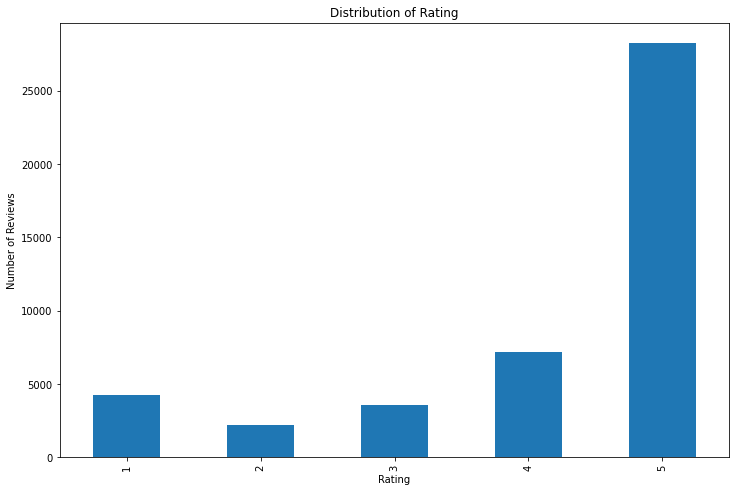

In [ ]:
## Plot Distribution Of Rating
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
product_r2['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

In [ ]:
# Distribution Of Rating Score
class_counts = product_r2.groupby('Rating').size()
class_counts

Rating
1     4246
2     2178
3     3565
4     7202
5    28229
dtype: int64

In [ ]:
# Customer totals for each rating class
product_r2['rating_class'].value_counts()

good    38996
bad      6424
Name: rating_class, dtype: int64

In [ ]:
# Statistics of non-numeric variables

# Number of unique Customers
print('\nNumber of unique customers : {}'.format(len(product_r2['reviewerID'].unique())))
      
# Number of unique Brands
print('\nNumber of unique Brands : {}'.format(len(product_r2['brand'].unique())))
      
# Review number per unique Customer
print('\nReview per customer: {}'.format((len(product_r2)/len(product_r2['Rating'].unique()))))      

# Review number per unique Brand 
print('\nReview per product: {}'.format((len(product_r2)/len(product_r2['brand'].unique()))))


Number of unique customers : 25213

Number of unique Brands : 137

Review per customer: 9084.0

Review per product: 331.53284671532845


**Descriptive Statistic Summary:**
Rating Status:

25213 customer gives ratings and mean of the ratings is 4.1, which means that customers prefer to give high ratings for products. To be able to predict the ratings reasonably, we classified them as 'good' and 'bad' above.

According to the statistics on rating stars:
4246 customers give 1 star

2178 customers give 2 stars

3565 customers give 3 stars

7202 customers give 4 stars

28229 customers give 5 stars

6424 customers give bad ratings

38996 customers give good ratings



**FINDING TOP 10 COMAPNIES ACCORDING TO NUMBER OF MODELS**

In [ ]:
names = product_r2['brand']
names=names.str.lower()
names.head()
from collections import Counter
lis = []
for i in names:
    for j in i.split():
        lis.append(j)
# Calculating frequency of all words
freq = Counter(lis)
     
most_occur = freq.most_common(100)
print(most_occur)

[('samsung', 9235), ('blu', 7383), ('lg', 4041), ('apple', 3980), ('nokia', 3528), ('blackberry', 3143), ('motorola', 2922), ('htc', 1782), ('sony', 1307), ('huawei', 1104), ('tracfone', 820), ('asus', 730), ('zte', 636), ('alcatel', 489), ('lgic', 353), ('posh', 322), ('mobile', 322), ('pantech', 228), ('wireless,', 210), ('inc.', 210), ('palm', 197), ('at&t', 190), ('lenovo', 174), ('ericsson', 159), ('korea', 143), ('kyocera', 136), ('microsoft', 132), ('sharkk', 131), ('rca', 119), ('nextbit', 113), ('t-mobile', 105), ('motcb', 102), ('greatcall', 99), ('star', 98), ('casio', 68), ('google', 60), ('dell', 58), ('usa', 56), ('sanyo', 55), ('doogee', 54), ('verykool', 53), ('tokyoslurpkings', 50), ('oneplus', 48), ('electronics', 46), ('irulu', 42), ('svp', 39), ('tracone', 38), ('otterbox', 38), ('sky', 38), ('devices', 38), ('jiake', 35), ('tnso', 35), ('generic', 33), ('cubot', 32), ('polaroid', 32), ('sidekick', 31), ('moto', 29), ('x', 29), ('soonersoft', 29), ('jitterbug', 27),

 **Top 10 companies are as follows**
samsung
blu
lg
apple
nokia
blackberry
motorola
htc
sony
Huawe

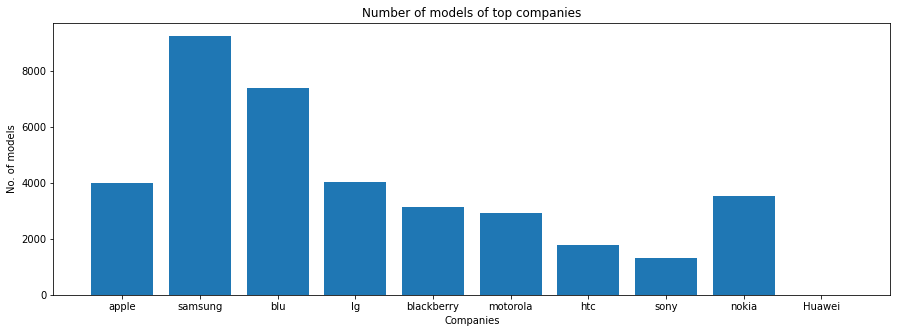

In [ ]:
#To show number of models on graph
top_companies=['apple','samsung','blu','lg','blackberry','motorola','htc','sony','nokia','Huawei']
no_of_models=[]
for i in top_companies:
    no_of_models.append(freq[i])


fig = plt.figure(figsize = (15, 5))
plt.bar(top_companies, no_of_models)
plt.xlabel("Companies")
plt.ylabel("No. of models")
plt.title("Number of models of top companies")
plt.show()

In [ ]:
#Save this data as a Csv file
product_r2.to_csv('/content/drive/MyDrive/Project/product_r2.csv')


In [ ]:
product_r2.head()

Rating  verified      reviewerID        asin  \
654       1     False   A5JLAU2ARJ0BO  B0000E3GWH   
655       4     False  A1ACM1CBGORBN1  B0000E3GWH   
656       3     False  A2V48Q03FZUOSD  B0000E3GWH   
657       5      True  A1V3TRGWOMA8LC  B0000E3GWH   
658       3     False  A3NOBH42C7UI5M  B0000E3GWH   

                                        style    reviewerName    DateTime  \
654  {'Package Type:': ' Standard Packaging'}    Old-and-Wise  2004-09-20   
655  {'Package Type:': ' Standard Packaging'}    Sherry Berry  2004-07-23   
656  {'Package Type:': ' Standard Packaging'}  Benjamin David  2004-07-05   
657  {'Package Type:': ' Standard Packaging'}   James Beswick  2004-04-11   
658  {'Package Type:': ' Standard Packaging'}          Kepela  2004-02-18   

     vote review_sentiment                                           category  \
654   2.0         NEGATIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   
655  15.0         POSITIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   
656  11.0         NEGATIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   
657   4.0         POSITIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   
658  12.0         POSITIVE  ['Cell Phones & Accessories', 'Cell Phones', '...   

                                           description  \
654  [Compatible with T-Mobile cellular service, Sa...   
655  [Compatible with T-Mobile cellular service, Sa...   
656  [Compatible with T-Mobile cellular service, Sa...   
657  [Compatible with T-Mobile cellular service, Sa...   
658  [Compatible with T-Mobile cellular service, Sa...   

                                                 title also_buy    brand  \
654  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   
655  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   
656  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   
657  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   
658  Samsung SGH E715 - Titanium blue (T-Mobile) Ce...       []  Samsung   

    feature                                               rank also_view  \
654      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   
655      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   
656      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   
657      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   
658      []  [>#3,059,436 in Cell Phones & Accessories (See...        []   

    similar_item price                                        review_text  \
654                     Bad reception This phone is ugly and heavy and...   
655                     Pretty good phone.. an improvement from my v20...   
656                     Not as user friendly as the Motorola V300- Thi...   
657                     The best phone I've ever owned ..and I'm from ...   
658                     I love the phone but it has some real problems...   

    rating_class  
654          bad  
655         good  
656         good  
657         good  
658         good